# **Feature engineering notebook**

## Objectives

Answer business requirement 2:

* The client wants to improve the predictive power of the model by creating new features and transforming existing ones.

## Inputs

* outputs/datasets/cleaned/house_prices_records_train.csv
* outputs/datasets/cleaned/house_prices_records_test.csv

## Outputs

* Generate code that performs feature engineering and prepares the data for building the ML pipeline.



---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\-MY STUDY-\\Coding\\projects\\project-5\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\-MY STUDY-\\Coding\\projects\\project-5'

# Load Data

In [4]:
import pandas as pd

# Load the cleaned data
train_df = pd.read_csv("outputs/datasets/cleaned/house_prices_records_train.csv")
test_df = pd.read_csv("outputs/datasets/cleaned/house_prices_records_test.csv")

# Display the first few rows of the cleaned data
train_df.head()
test_df.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,1068,0.0,3.0,No,663,GLQ,396,264,RFn,1963.0,...,8414,70.0,0.0,0,8,6,1059,1963,2003,154500
1,1500,0.0,3.0,Av,1032,GLQ,431,712,RFn,1994.0,...,12256,98.0,362.0,32,5,8,1463,1994,1995,325000
2,1028,0.0,2.0,No,0,Unf,1008,360,Unf,1927.0,...,8960,56.0,0.0,0,6,5,1008,1927,1950,115000
3,1004,0.0,3.0,No,399,ALQ,605,420,Unf,1950.0,...,5000,50.0,0.0,24,7,6,1004,1947,1950,159000
4,1620,0.0,2.0,Gd,1022,GLQ,598,912,Fin,2008.0,...,12898,89.0,70.0,0,5,9,1620,2007,2008,315500


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   1stFlrSF      1168 non-null   int64  
 1   2ndFlrSF      1168 non-null   float64
 2   BedroomAbvGr  1168 non-null   float64
 3   BsmtExposure  1168 non-null   object 
 4   BsmtFinSF1    1168 non-null   int64  
 5   BsmtFinType1  1168 non-null   object 
 6   BsmtUnfSF     1168 non-null   int64  
 7   GarageArea    1168 non-null   int64  
 8   GarageFinish  1168 non-null   object 
 9   GarageYrBlt   1168 non-null   float64
 10  GrLivArea     1168 non-null   int64  
 11  KitchenQual   1168 non-null   object 
 12  LotArea       1168 non-null   int64  
 13  LotFrontage   1168 non-null   float64
 14  MasVnrArea    1168 non-null   float64
 15  OpenPorchSF   1168 non-null   int64  
 16  OverallCond   1168 non-null   int64  
 17  OverallQual   1168 non-null   int64  
 18  TotalBsmtSF   1168 non-null 

In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   1stFlrSF      292 non-null    int64  
 1   2ndFlrSF      292 non-null    float64
 2   BedroomAbvGr  292 non-null    float64
 3   BsmtExposure  292 non-null    object 
 4   BsmtFinSF1    292 non-null    int64  
 5   BsmtFinType1  292 non-null    object 
 6   BsmtUnfSF     292 non-null    int64  
 7   GarageArea    292 non-null    int64  
 8   GarageFinish  292 non-null    object 
 9   GarageYrBlt   292 non-null    float64
 10  GrLivArea     292 non-null    int64  
 11  KitchenQual   292 non-null    object 
 12  LotArea       292 non-null    int64  
 13  LotFrontage   292 non-null    float64
 14  MasVnrArea    292 non-null    float64
 15  OpenPorchSF   292 non-null    int64  
 16  OverallCond   292 non-null    int64  
 17  OverallQual   292 non-null    int64  
 18  TotalBsmtSF   292 non-null    

* Let's perform check for missing values in the training and testing data

In [7]:
# Check for missing values in the training and testing data
print("Missing values in training data:")
print(train_df.isnull().sum())

print("\nMissing values in testing data:")
print(test_df.isnull().sum())

Missing values in training data:
1stFlrSF        0
2ndFlrSF        0
BedroomAbvGr    0
BsmtExposure    0
BsmtFinSF1      0
BsmtFinType1    0
BsmtUnfSF       0
GarageArea      0
GarageFinish    0
GarageYrBlt     0
GrLivArea       0
KitchenQual     0
LotArea         0
LotFrontage     0
MasVnrArea      0
OpenPorchSF     0
OverallCond     0
OverallQual     0
TotalBsmtSF     0
YearBuilt       0
YearRemodAdd    0
SalePrice       0
dtype: int64

Missing values in testing data:
1stFlrSF        0
2ndFlrSF        0
BedroomAbvGr    0
BsmtExposure    0
BsmtFinSF1      0
BsmtFinType1    0
BsmtUnfSF       0
GarageArea      0
GarageFinish    0
GarageYrBlt     0
GrLivArea       0
KitchenQual     0
LotArea         0
LotFrontage     0
MasVnrArea      0
OpenPorchSF     0
OverallCond     0
OverallQual     0
TotalBsmtSF     0
YearBuilt       0
YearRemodAdd    0
SalePrice       0
dtype: int64


There is no missing values in both datasets. Next step will be converting categorical variables into numerical format using one-hot encoding and ensuring that both training and testing datasets have the same columns after encoding.

In [8]:
# Encode categorical variables using one-hot encoding
categorical_columns = ['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual']
train_df_encoded = pd.get_dummies(train_df, columns=categorical_columns)
test_df_encoded = pd.get_dummies(test_df, columns=categorical_columns)

## Create Interaction Features

* At this step we create new interaction features by combining existing ones to capture more complex relationships between features.

In [9]:
# Create interaction features
train_df_encoded['OverallQual_GrLivArea'] = train_df_encoded['OverallQual'] * train_df_encoded['GrLivArea']
test_df_encoded['OverallQual_GrLivArea'] = test_df_encoded['OverallQual'] * test_df_encoded['GrLivArea']

train_df_encoded['TotalBsmtSF_1stFlrSF'] = train_df_encoded['TotalBsmtSF'] * train_df_encoded['1stFlrSF']
test_df_encoded['TotalBsmtSF_1stFlrSF'] = test_df_encoded['TotalBsmtSF'] * test_df_encoded['1stFlrSF']

## Apply Various Transformations to Skewed Features

Apply various transformations to skewed features to reduce skewness and improve model performance.

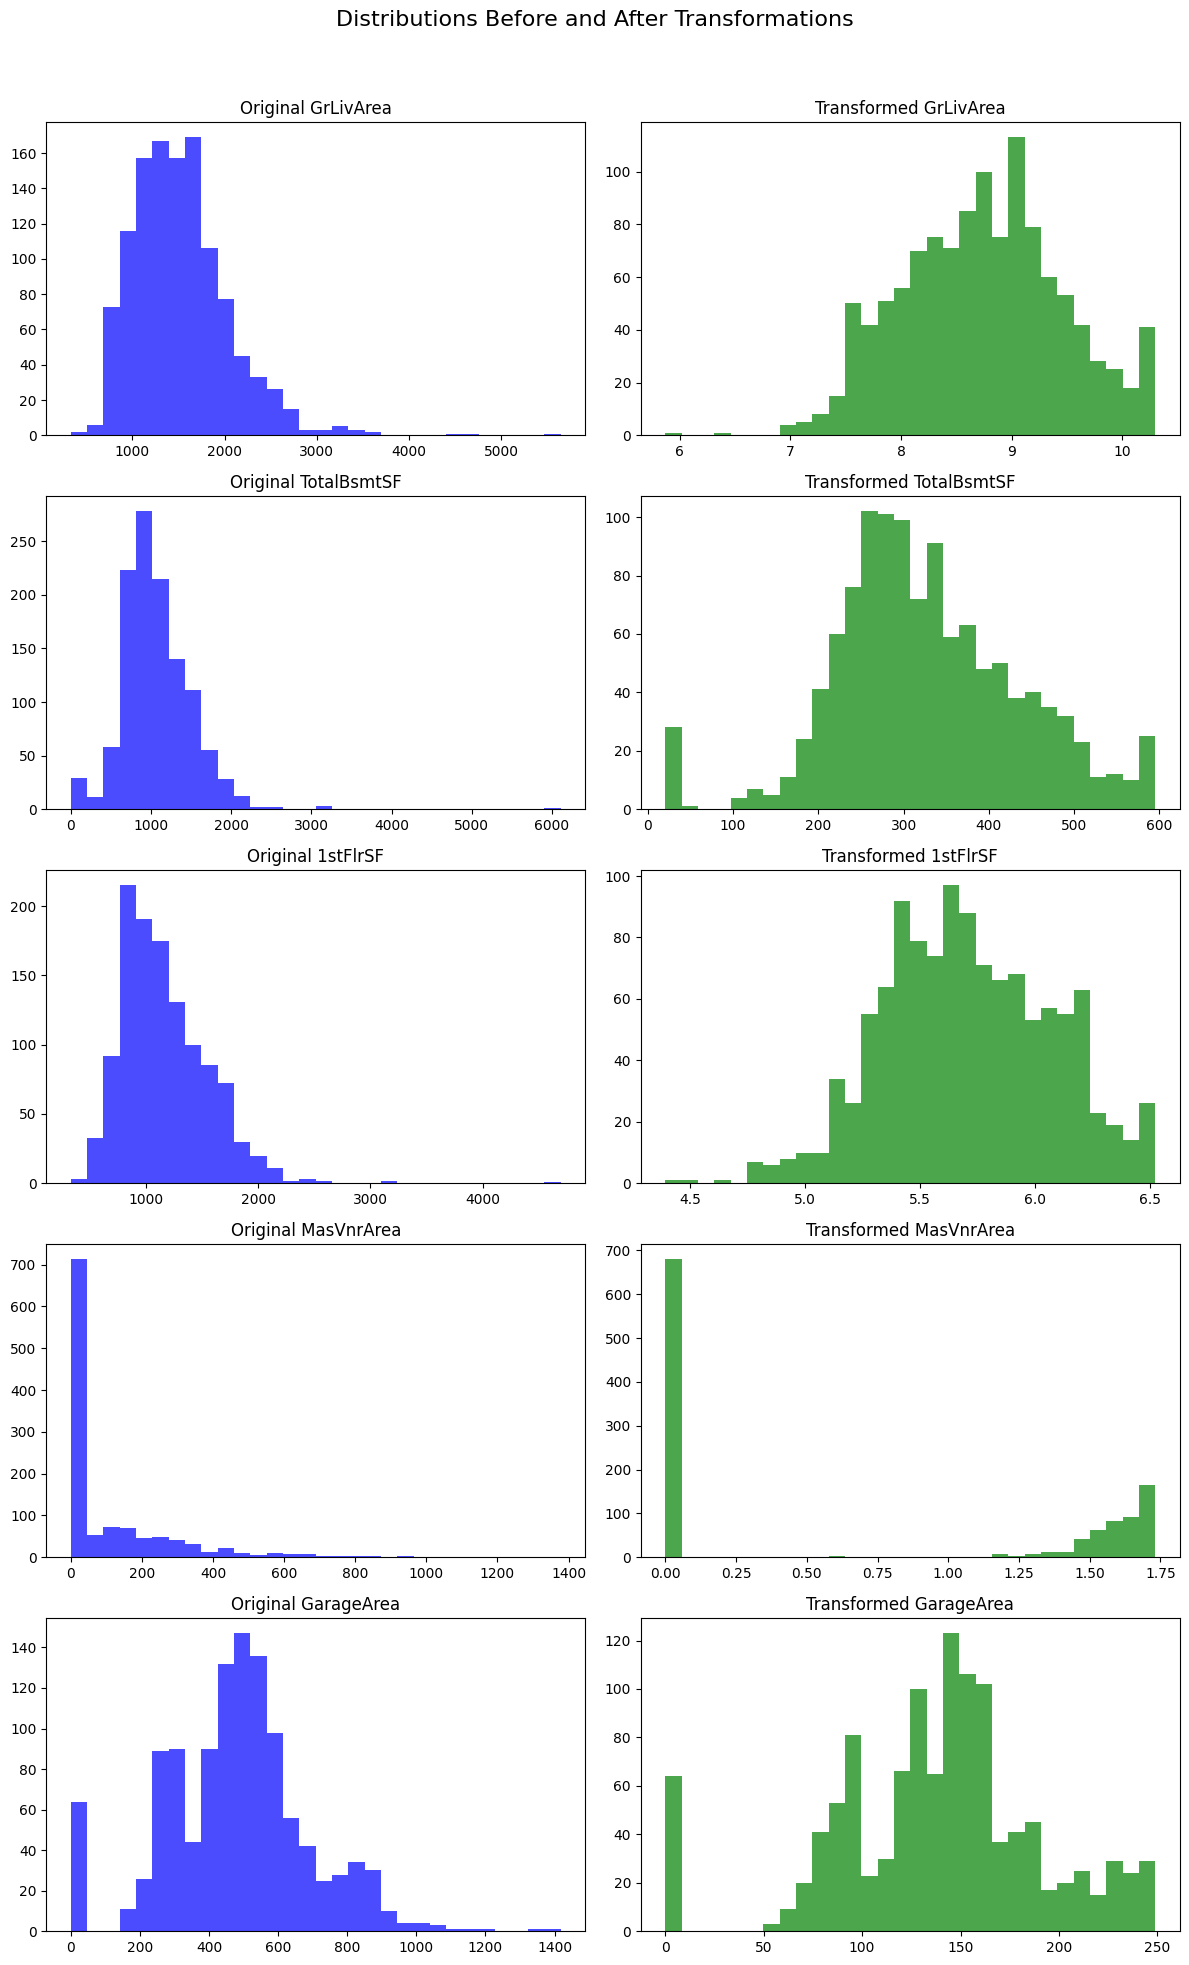

In [11]:
import pandas as pd
import numpy as np
from feature_engine.transformation import PowerTransformer, YeoJohnsonTransformer
from feature_engine.outliers import Winsorizer
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Apply Winsorizer, Power Transformer, and Yeo-Johnson Transformer to skewed features
skewed_features = ['GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'MasVnrArea', 'GarageArea']

# Visualize the distributions before transformations
fig, axes = plt.subplots(len(skewed_features), 2, figsize=(12, 20))
fig.suptitle('Distributions Before and After Transformations', fontsize=16)

for i, feature in enumerate(skewed_features):
    # Plot original distribution
    axes[i, 0].hist(train_df_encoded[feature], bins=30, color='blue', alpha=0.7)
    axes[i, 0].set_title(f'Original {feature}')
    
    # Apply transformations
    winsorizer = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=[feature])
    train_df_encoded = winsorizer.fit_transform(train_df_encoded)
    test_df_encoded = winsorizer.transform(test_df_encoded)
    
    pt = PowerTransformer(variables=[feature])
    train_df_encoded = pt.fit_transform(train_df_encoded)
    test_df_encoded = pt.transform(test_df_encoded)
    
    yjt = YeoJohnsonTransformer(variables=[feature])
    train_df_encoded = yjt.fit_transform(train_df_encoded)
    test_df_encoded = yjt.transform(test_df_encoded)
    
    # Plot transformed distribution
    axes[i, 1].hist(train_df_encoded[feature], bins=30, color='green', alpha=0.7)
    axes[i, 1].set_title(f'Transformed {feature}')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

---

# Conclusions

After applying the Winsorizer, Power Transformer, and Yeo-Johnson Transformer to the skewed features, we observed that the transformations effectively reduced skewness, making the distributions more symmetric and closer to a normal distribution. The Winsorizer helped cap extreme values, reducing the impact of outliers. 

Overall, these transformations have improved the data quality, making it more suitable for modeling and likely to enhance the performance of machine learning models.